In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('exportado_credito.csv')
df

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER_F,CODE_GENDER_M,OCCUPATION_TYPE_INT,NAME_EDUCATION_TYPE_INT,NAME_FAMILY_STATUS_INT,NAME_HOUSING_TYPE_INT,HAVE_CHILDREN,AGE_YEARS,AGE_EMPLOYED
0,5008806,1,1,-0.704169,0,0,0,2,0,1,10,1,1,1,0,58.8,3.1
1,5008808,0,1,0.642308,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
2,5008809,0,1,0.642308,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
3,5008810,0,1,0.642308,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
4,5008811,0,1,0.642308,0,1,1,1,1,0,3,1,2,1,0,52.3,8.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304349,6837707,0,1,0.065247,1,0,0,2,0,1,1,2,3,1,0,37.0,6.3
304350,6839936,1,1,-0.511815,0,0,0,3,0,1,1,1,1,1,1,34.4,5.7
304351,6840222,0,0,-0.781110,0,0,0,1,1,0,1,1,2,1,0,43.6,8.2
304352,6841878,0,0,-1.204289,1,0,0,1,1,0,3,2,2,2,0,22.4,1.0


<Axes: >

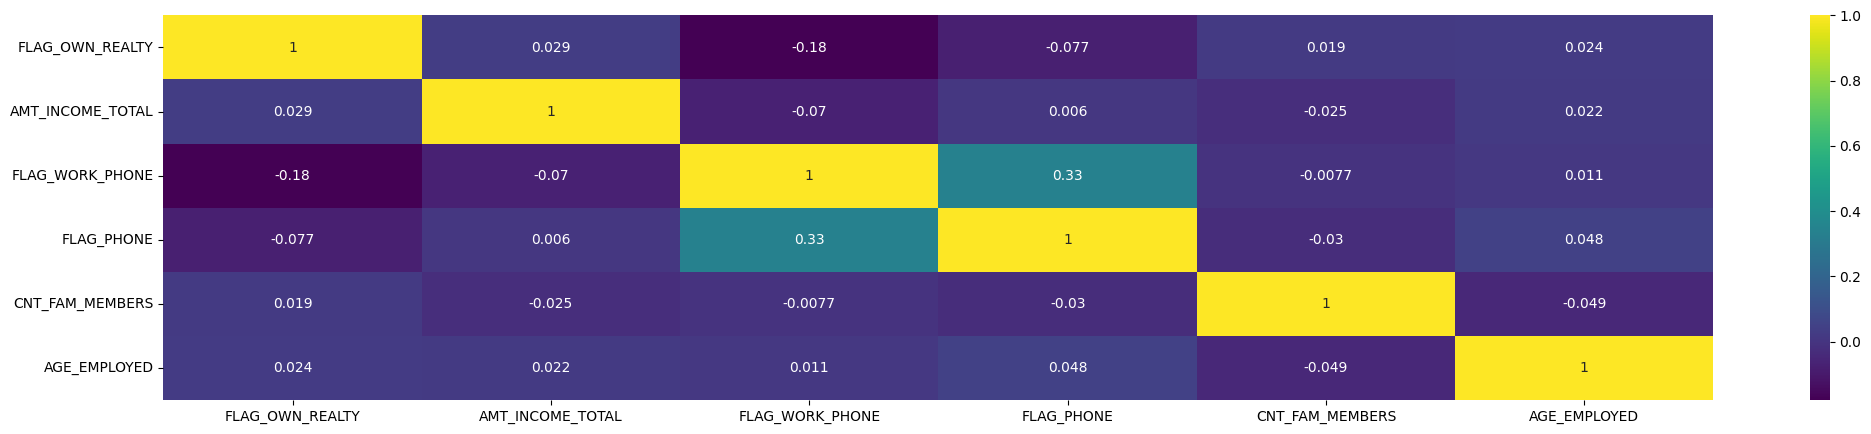

In [2]:
# Primero elimina columnas del DataFrame original
columnas_a_eliminar = [
    'ID', 'FLAG_OWN_CAR', 'HAVE_CHILDREN', 'NAME_FAMILY_STATUS_INT', 'CODE_GENDER_F', 'CODE_GENDER_M',
    'DAYS_BIRTH', 'AGE_YEARS', 'OCCUPATION_TYPE_INT', 'NAME_HOUSING_TYPE_INT', 'NAME_EDUCATION_TYPE_INT', 'FLAG_MOBIL', 'FLAG_EMAIL'
]

df_filtrado = df.drop(columns=columnas_a_eliminar, errors='ignore')  # 'ignore' evita error si faltan columnas
df_filtrado = df_filtrado.select_dtypes(include=['int64', 'float64'])  # ahora sí, solo numéricas

# Graficar matriz de correlación
plt.figure(figsize=(25, 5))
sns.heatmap(df_filtrado.corr(), annot=True, cmap="viridis")

In [3]:
df['puntaje_credito'] = (
    df['AMT_INCOME_TOTAL'] * 2 +
    df['FLAG_OWN_REALTY'].astype(int) * 1.5 +
    df['FLAG_PHONE'].astype(int) * 1.5 +
    (df['AGE_EMPLOYED'] >= 2).astype(int) * 1.5 +
    df['AGE_YEARS'].apply(lambda x: 1 if 25 <= x <= 55 else 0) * 1 +
    df['NAME_EDUCATION_TYPE_INT'].isin([0, 1, 2]).astype(int) * 1 +
    (df['CNT_FAM_MEMBERS'] <= 5).astype(int) * 1 +
    df['NAME_FAMILY_STATUS_INT'].isin([0, 1, 2, 3]).astype(int) * 1
)
df['estado_credito'] = df['puntaje_credito'].apply(lambda x: 1 if x >= 7 else 0)

In [4]:
df['estado_credito'].value_counts()

estado_credito
0    200456
1    103898
Name: count, dtype: int64

In [5]:
X = df[['FLAG_OWN_REALTY', 'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS',
        'NAME_EDUCATION_TYPE_INT', 'NAME_FAMILY_STATUS_INT',
        'AGE_EMPLOYED', 'FLAG_PHONE']]
Y=df["estado_credito"]

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=8, random_state=42)
modelo.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy * 100:.2f}%")

Precisión del modelo: 98.59%


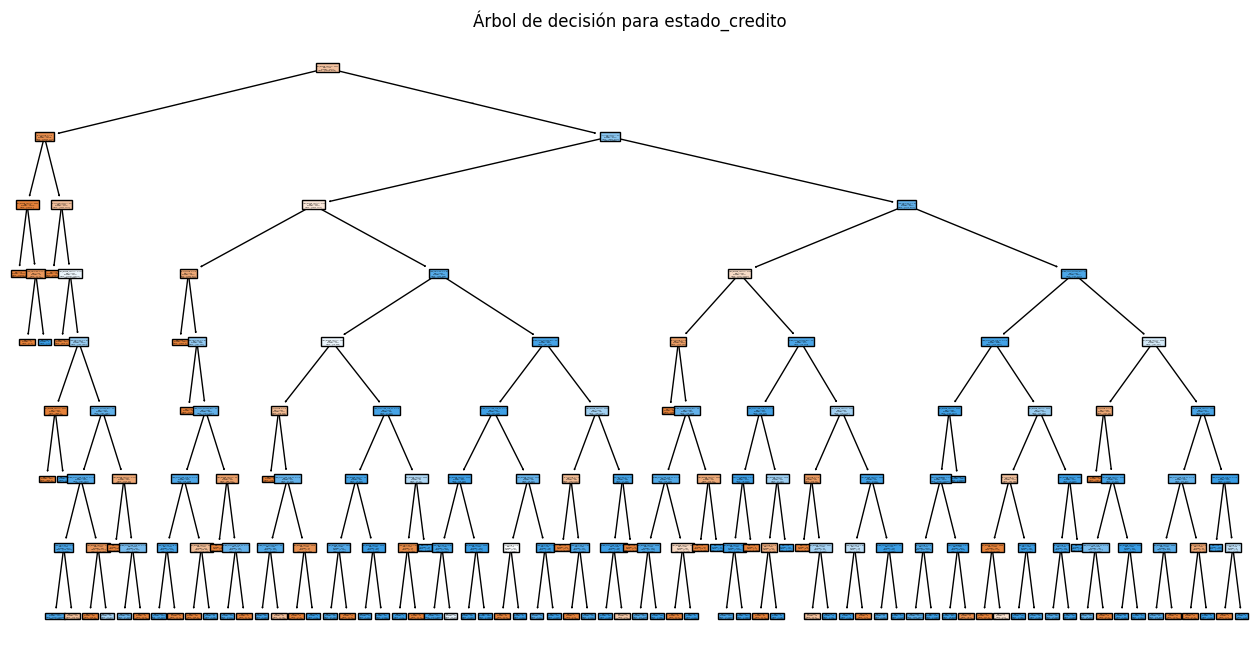

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))
plot_tree(modelo, feature_names=X.columns, class_names=["No Aprobado", "Aprobado"], filled=True)
plt.title("Árbol de decisión para estado_credito")
plt.show()

In [10]:
x_train.shape, x_test.shape

((243483, 7), (60871, 7))

In [11]:
from sklearn.discriminant_analysis import StandardScaler


escala = StandardScaler()
x_train = escala.fit_transform(x_train)
x_test = escala.transform(x_test)

In [12]:
import sklearn


RGL = sklearn.linear_model.LogisticRegression(class_weight = 'balanced')
RGL.fit(x_train, y_train)

LogisticRegression(class_weight='balanced')

In [13]:
from sklearn.metrics import confusion_matrix
y_pred = RGL.predict(x_test)
matrix = confusion_matrix(y_test, y_pred)
matrix

array([[36792,  3416],
       [ 1444, 19219]])

Text(95.72222222222221, 0.5, 'Real')

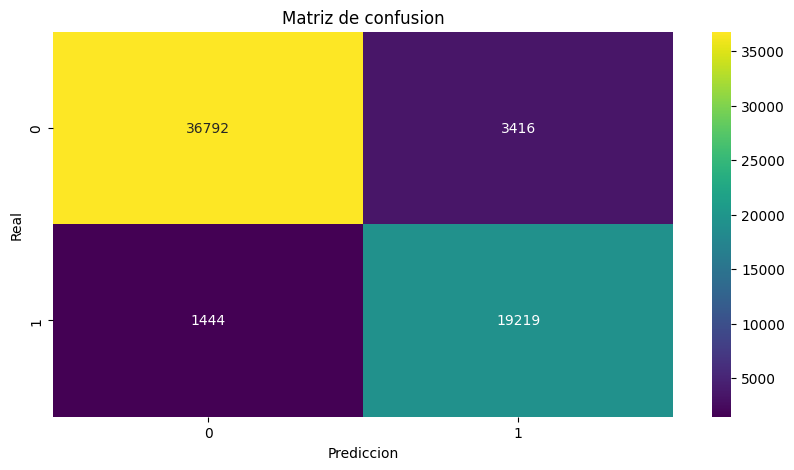

In [14]:
plt.figure(figsize=(10,5))
sns.heatmap(matrix, annot=True, cmap="viridis", fmt="d")
plt.title("Matriz de confusion")
plt.xlabel("Prediccion")
plt.ylabel("Real")

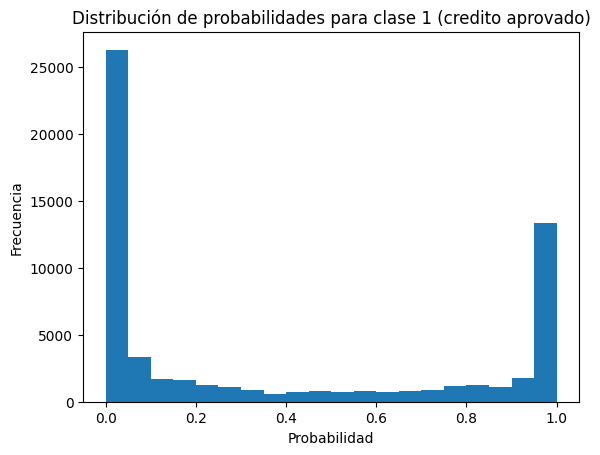

In [15]:
df['estado_credito'].value_counts(normalize=True)
y_proba = RGL.predict_proba(x_test)
y_proba
plt.hist(y_proba[:,1], bins=20)
plt.title("Distribución de probabilidades para clase 1 (credito aprovado)")
plt.xlabel("Probabilidad")
plt.ylabel("Frecuencia")
plt.show()

In [16]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_model = CalibratedClassifierCV(RGL, method='sigmoid')  # o 'isotonic'
calibrated_model.fit(x_train, y_train)

CalibratedClassifierCV(estimator=LogisticRegression(class_weight='balanced'))

In [17]:
y_proba_calibrated = calibrated_model.predict_proba(x_test)
y_proba_calibrated

array([[9.99543001e-01, 4.56999040e-04],
       [2.25844572e-01, 7.74155428e-01],
       [9.86249153e-01, 1.37508466e-02],
       ...,
       [5.23371233e-04, 9.99476629e-01],
       [9.86085704e-01, 1.39142958e-02],
       [6.56195299e-04, 9.99343805e-01]], shape=(60871, 2))

In [18]:

y_proba_original = RGL.predict_proba(x_test)
y_proba_original

array([[9.99548013e-01, 4.51986527e-04],
       [1.15162643e-01, 8.84837357e-01],
       [9.81483858e-01, 1.85161417e-02],
       ...,
       [1.30387229e-04, 9.99869613e-01],
       [9.81241437e-01, 1.87585628e-02],
       [1.66964955e-04, 9.99833035e-01]], shape=(60871, 2))

In [19]:
#  probabilidades de clase 1
y_proba_original = RGL.predict_proba(x_test)[:, 1]
y_proba_calibrated = calibrated_model.predict_proba(x_test)[:, 1]

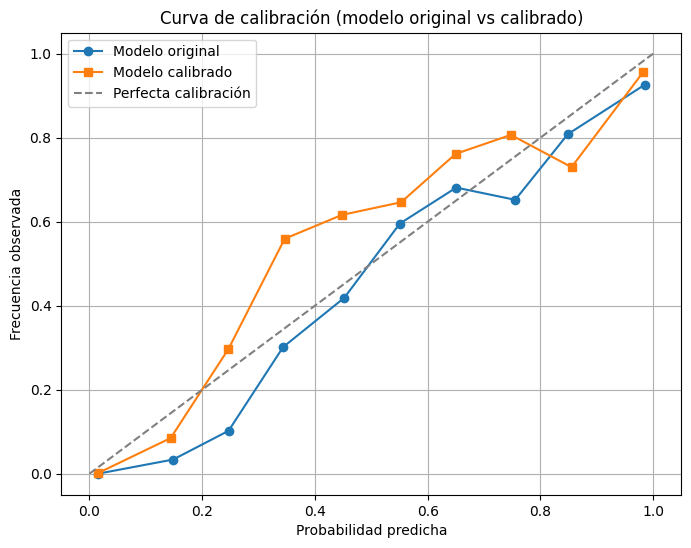

In [20]:
from sklearn.calibration import calibration_curve
# Curvas de calibración
prob_true_orig, prob_pred_orig = calibration_curve(y_test, y_proba_original, n_bins=10)
prob_true_cal, prob_pred_cal = calibration_curve(y_test, y_proba_calibrated, n_bins=10)

# Gráfica
plt.figure(figsize=(8, 6))
plt.plot(prob_pred_orig, prob_true_orig, marker='o', label='Modelo original')
plt.plot(prob_pred_cal, prob_true_cal, marker='s', label='Modelo calibrado')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfecta calibración')

plt.xlabel('Probabilidad predicha')
plt.ylabel('Frecuencia observada')
plt.title('Curva de calibración (modelo original vs calibrado)')
plt.legend()
plt.grid()

In [ ]:
y_proba = modelo_calibrado.predict_proba(X_test)[:, 1]

# Si prefieres ser más estricto (menos falsos positivos):
y_pred = (y_proba >= 0.6).astype(int)

# O más flexible (menos falsos negativos):
# y_pred = (y_proba >= 0.4).astype(int)